<a href="https://colab.research.google.com/github/smit585/ReinforcementLearning/blob/master/Optimization_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background 

## Mathematical Formulation in Standard Form

### Nonlinear Programming Problem (NLP): 
A standard problem formulation in numerical optimization

$$min_w  \phi(w)$$   <br>
$s.t:$ <br> 
$$g_1(w) \leq 0$$ 
$$g_2(w) = 0$$


# Optimization Problem 1



> Source: <br>
https://www.youtube.com/watch?v=cXHvC_FGx24


$min(x_1*x_4*(x_1 + x_2 + x_3) + x_3)$

$s.t: $ <br>
$  x_1 + x_2 + x_3 + x_4 \geq 25$ <br>
$ x_1^2 + x_2^2 + x_3^2 + x_4^2 = 40$ <br>
$ 1 \leq x_1, x_2, x_3, x_4 \leq 5$

Initial Guess: 
$ x_0 = (1, 5, 5, 1) $




In [56]:
import numpy as np
from scipy.optimize import minimize

In [57]:
def objective_fun(x):
  x1 = x[0]
  x2 = x[1]
  x3 = x[2]
  x4 = x[3]
  return x1*x4*(x1 + x2 + x3) + x3

In [58]:
# This constraint is an inequality constraint
def constraint1(x):
  return x[0]*x[1]*x[2]*x[3] - 25

In [59]:
# This constraint is an equality constraint
def constraint2(x):
  return 40 - (x[0]**2 + x[1]**2 + x[2]**2+ x[3]**2)

In [60]:
# Bounds for all x is [1, 5]
b= (1, 5)
bounds = (b, b, b, b)

# Initial guess:
x0 = [1, 5, 5, 1]

In [61]:
# Array of constraints
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'eq', 'fun': constraint2}
constraints = [con1, con2]

In [62]:
sol = minimize(objective_fun, x0, method='SLSQP', bounds=bounds, constraints=constraints)

In [63]:
print(sol)

     fun: 17.01401724556073
     jac: array([14.57227039,  1.37940764,  2.37940764,  9.56415081])
 message: 'Optimization terminated successfully.'
    nfev: 30
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.        , 4.74299607, 3.82115466, 1.37940764])


> Source problems 2-4: <br>
https://www.youtube.com/watch?v=RrnkPrcpyEA&t=4348s



# Optimization Problem 2

Find the local minimum of the following function:
**$ \phi(w) = w^2 - 6w + 13$**

Optimization Problem

$$ min (w^2 - 6w + 13)$$

This can be solved analytically too: <br>
$$\frac{d\phi(w)}{dw} = 2w - 6$$
$$w = 3$$

Text(0.5, 1.0, 'Cost Function')

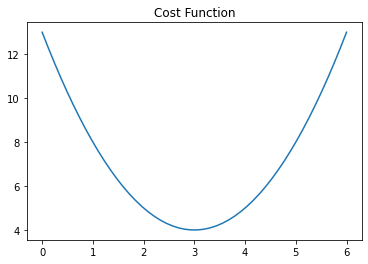

In [72]:
import matplotlib.pyplot as plt

x = np.linspace(0, 6, num=50)

y = np.zeros(x.size)
for i in range(x.size):
  y[i] = x[i]**2 - 6*x[i] + 13

plt.plot(x, y)
plt.title('Cost Function')

Optimization Problem

$$ min (w^2 - 6w + 13)$$

Unconstrained and boundless problem

Initial Guess = -0.5

In [88]:
def obf2(w):
  return w**2 - 6*w + 13

In [89]:
sol = minimize(obf2, x0=-0.5, method='SLSQP')

In [90]:
print(sol)

     fun: 4.0
     jac: array([0.])
 message: 'Optimization terminated successfully.'
    nfev: 7
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([3.])


# Optimization Problem 3

$$min_w (\mathrm{e}^{0.2w}*sin(w))$$

$s.t.$
$$w \geq 0$$
$$w \leq 4\pi$$ 

Initial Guess:
$$x_0 = 10$$

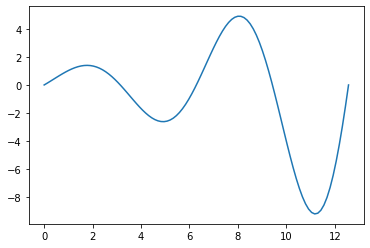

In [99]:
import math
import matplotlib.pyplot as plt

w = np.linspace(0, 4*np.pi, num=100)
y = np.zeros(w.size)
for i in range(w.size):
  y[i] = math.exp(0.2*w[i])*np.sin(w[i])

plt.plot(w, y)

We see that there are two minimum of this function in $[0, 4\pi]$ <br>
$0$ is also a local minimum here as in the range its neighbourhood only increases in value.

Therefore initial guess is important for us otherwise we will be stuck at a local minimum instead

In [100]:
def ob3(w):
  return math.exp(0.2*w)*np.sin(w)

In [110]:
bounds = [(0, 4*np.pi)]
x0 = [10]

In [113]:
# Change the initial x0, sol.x will change accordingly
# x0 = 1; sol.x = 0
# x0 = 4; sol.x = 4.9098
# x0 = 10;sol.x = 11.1929
sol = minimize(ob3, x0=10, method='SLSQP', bounds=bounds)

In [114]:
print(sol)

     fun: -9.197977391818991
     jac: array([-0.00055301])
 message: 'Optimization terminated successfully.'
    nfev: 16
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([11.19291205])


# Optimization Problem 4

This is a linear regression problem. For the following set of data points, 
fit a straight line of the form

$$y = mx + c$$

*   Here, we minimize the sum of squared errors, between the line and the data points (Least Squares) 
*   Two optimization variables (m and c)

Objective Function:

$$\phi(m, c) = \sum_{i=1}^{n_{data}}(y(i)- (m.x(i) + c))^2$$

$$min_{m,c}(\phi(m, c))$$


Initial Guess:
$$m = 0.5, c = 1$$ 



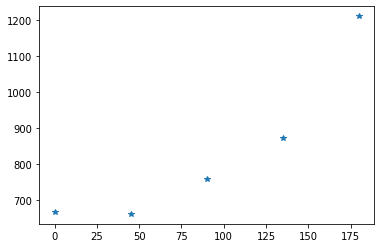

In [144]:
import matplotlib.pyplot as plt

x = np.array([0, 45, 90, 135, 180])
y = np.array([667, 661, 757, 871, 1210])

plt.plot(x, y, '*')

This is the data that we have, we need to find the equation of the line that minimizes the least square errors of all the points

In [145]:
def obj4(w):
  obj = 0
  m = w[0]
  c = w[1]
  for i in range(x.size):
    obj += (y[i] - (m*x[i] + c))**2

  return obj

In [146]:
x0 = [0.5, 1]

In [147]:
sol = minimize(obj4, x0, method='SLSQP')

In [148]:
print(sol)

     fun: 38527.20000000125
     jac: array([ 0.        , -0.00048828])
 message: 'Optimization terminated successfully.'
    nfev: 26
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([  2.88000019, 573.99997274])


In [149]:
slope = sol.x[0]
interc = sol.x[1]

point1_x = 0
point1_y = interc

point2_x = 180
point2_y = slope*point2_x + interc

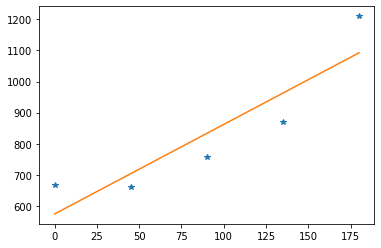

In [151]:
plt.plot(x, y, '*')
plt.plot([point1_x, point2_x], [point1_y, point2_y])

Thus, the line with the given slope and intercept provides the least squared sum for the given data points.

> Source problem: <br>
https://www.youtube.com/watch?v=M7ZA9fq2zCE

# Optimization Problem 5

Objective Function:

$$min(x_1^2 + x_1*x_2)$$
$s.t.$

$$x_1^3 + x_1*x_2 = 100$$
$$x_1^3 + x_1*x_2 \geq 50$$

$$-100 \leq x_1, x_2 \leq 100$$

Initial Value:
$$x0 = [1, 1]$$


In [161]:
def obj5(x):
  x1 = x[0]
  x2 = x[1]

  return x1**2 + x1*x2

In [162]:
def equality_constraint(x):
  x1 = x[0]
  x2 = x[1]

  return 100 - (x1**3 + x1*x2)


In [163]:
def inequality_constraint(x):
  x1 = x[0]
  x2 = x[1]

  return x1*3 + x1*x2 - 50 

In [164]:
b = (-100, 100)
bounds = (b, b)

constraint1 = {'type' : 'eq', 'fun': equality_constraint}
constraint2 = {'type' : 'ineq', 'fun': inequality_constraint}

constraints = (constraint1, constraint2)

x0 = [1, 1]

In [165]:
sol = minimize(obj5, x0, method='SLSQP', bounds=bounds, constraints=constraints)

In [166]:
print(sol)

     fun: 53.77711343103649
     jac: array([17.55220366,  3.95501804])
 message: 'Optimization terminated successfully.'
    nfev: 25
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([3.95501801, 9.64216746])
